# Algorytmy ewolucyjne i metaheurystyczne - Heurystyki konstrukcyjne

**Install libs**

!pip install requests
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install pandoc

**Get data url:**

In [1]:
import requests

target_url_kroa100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA100.tsp"
target_url_krob100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB100.tsp"
target_url_kroa200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA200.tsp"
target_url_krob200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB200.tsp"


def get_file_from_url(target_url):
    file = requests.get(target_url)
    return file.text

**Output test:**

In [2]:
data = get_file_from_url(target_url_krob100)
for line in data.split("\n")[6:-2]:
    print(line.split())

['1', '3140', '1401']
['2', '556', '1056']
['3', '3675', '1522']
['4', '1182', '1853']
['5', '3595', '111']
['6', '962', '1895']
['7', '2030', '1186']
['8', '3507', '1851']
['9', '2642', '1269']
['10', '3438', '901']
['11', '3858', '1472']
['12', '2937', '1568']
['13', '376', '1018']
['14', '839', '1355']
['15', '706', '1925']
['16', '749', '920']
['17', '298', '615']
['18', '694', '552']
['19', '387', '190']
['20', '2801', '695']
['21', '3133', '1143']
['22', '1517', '266']
['23', '1538', '224']
['24', '844', '520']
['25', '2639', '1239']
['26', '3123', '217']
['27', '2489', '1520']
['28', '3834', '1827']
['29', '3417', '1808']
['30', '2938', '543']
['31', '71', '1323']
['32', '3245', '1828']
['33', '731', '1741']
['34', '2312', '1270']
['35', '2426', '1851']
['36', '380', '478']
['37', '2310', '635']
['38', '2830', '775']
['39', '3829', '513']
['40', '3684', '445']
['41', '171', '514']
['42', '627', '1261']
['43', '1490', '1123']
['44', '61', '81']
['45', '422', '542']
['46', '2698',

**Get lat lon from data**

In [3]:
def get_lat_lon_from_url(target_url):
    data = get_file_from_url(target_url)
    list_of_cords = data.split("\n")[6:-2]
    return zip(*[(int(i.split()[1]), int(i.split()[2])) for i in list_of_cords])


**Calculate matrix**

In [4]:
import pandas as pd
import numpy as np
import math


def calc_matrix(lat, lon):
    matrix_size = len(lat)
    matrix = pd.DataFrame(
        np.nan, index=np.arange(matrix_size), columns=np.arange(matrix_size)
    )
    for row in range(matrix.shape[0]):
        for col in range(row, matrix.shape[1]):
            if row == col:
                matrix.iat[row, col] = np.inf
            else:
                matrix.iat[row, col] = matrix.iat[col, row] = round(
                    math.sqrt(
                        ((lat[col] - lat[row]) ** 2) + ((lon[col] - lon[row]) ** 2)
                    )
                )

    return matrix

**Display steps dynamically**

In [5]:
import matplotlib.pyplot as plt


def test_display_dynamically(tedis, distance_matrix, lat, lon):
    from IPython.display import clear_output

    for elem in tedis:
        clear_output(wait=True)
        x, y = [], []
        plt.scatter(lat, lon, color="black")
        for i, vertex in enumerate(elem):
            x.append(lat[vertex])
            y.append(lon[vertex])
            plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
            plt.annotate(i, (lat[vertex], lon[vertex]))
        plt.scatter(lat[elem[0]], lon[elem[0]], color="green", zorder=2)
        plt.plot(x, y, zorder=1)

        path_length = calculate_path_length(elem, distance_matrix)
        plt.figtext(
            1.02,
            0.5,
            "Path length {path_length}".format(path_length=path_length),
            horizontalalignment="center",
            wrap=True,
            fontsize=10,
            bbox={"facecolor": "grey", "alpha": 0.3, "pad": 5},
        )
        plt.pause(0.02)
    plt.show()
    return True

In [6]:
def get_combs(current_tsp):
    return [
        [current_tsp[i], current_tsp[i + 1]] for i, d in enumerate(current_tsp[:-1])
    ]


def calculate_path_length(tsp_final_outcome, distance_matrix):
    return sum(
        [distance_matrix.loc[x, y].sum() for (x, y) in get_combs(tsp_final_outcome)]
    )

**NN Algorithm:**

In [7]:
def get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    neigbrs = distance_matrix.nsmallest(num, idx)
    neigbrs_list = list(neigbrs.index)
    return neigbrs_list

In [8]:
import random


def tsp_nn(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    tsp_outcome = [selected_vertex]
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 1):
        # find minimum in column
        ix_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
        # push min to outcome
        tsp_outcome.append(ix_min)
        test_display.append(tsp_outcome.copy())
        # set distance to 0
        distance_matrix_truncated = distance_matrix_truncated.drop(
            index=selected_vertex, columns=selected_vertex
        )
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
    test_display[-1].append(test_display[-1][0])
    return tsp_outcome, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, tedis_nn= tsp_nn(distance_matrix, 41)



test_display_dynamically(tedis_nn, distance_matrix, lat, lon)

**NN ALG Run:**

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)


for i in range(10):
    tsp, ted = tsp_nn(distance_matrix,selected_vertex = i)
    print(len(tsp))

#test_display_dynamically(ted, distance_matrix,nn=True)

**Greedy Cycle Alg**

In [9]:
import pandas as pd
import numpy as np


def get_index_min_value_in_cols(list_of_cols, distance_matrix):
    distance_matrix_truncated = distance_matrix.drop(list(set(list_of_cols)))
#     display(distance_matrix_truncated)
    min_value_list = distance_matrix_truncated[list_of_cols].min()
#     print("l", min_value_list)
    min_value = min_value_list.min()
#     print("m", min_value)
    min_value_index_in_list = min_value_list.to_list().index(min_value)
#     print("fin", min_value_index_in_list)
    col_index_in_distance_matrix = list_of_cols[min_value_index_in_list]
    ix_min = int(distance_matrix_truncated[col_index_in_distance_matrix].idxmin())
    return ix_min

In [10]:
def get_min_length_to_point(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points


def insert_after_element(current_tsp, elem, value_to_insert):
    elem_index = current_tsp.index(elem)
    current_tsp.insert(elem_index + 1, value_to_insert)
    return current_tsp

In [11]:
import random
import numpy as np


def tsp_greedy(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        # find minimum in current tsp outcome
        ix_min = int(
            get_index_min_value_in_cols(tsp_outcome, distance_matrix_truncated)
        )

        # find suitable place to insert elem
        x, y = get_min_length_to_point(ix_min, tsp_outcome, distance_matrix_truncated)

        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
        test_display.append(tsp_outcome.copy())

    return tsp_outcome, distance_matrix_truncated, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML
lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
%timeit tsp, d,tedis_greedy= tsp_greedy(distance_matrix, 41)



test_display_dynamically(tedis_greedy, distance_matrix, lat, lon)

**Regret ALG**

In [12]:
def get_cost(point, current_tsp, distance_matrix):
    minimal_points = []
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_cost = new_length - x_y_distance
        minimal_points.append((total_cost, x, y, point))
    # sort
    minimal_points.sort(key=lambda x: x[0])
    # 2 regret
    diff = minimal_points[1][0] - minimal_points[0][0]
    x = minimal_points[0][1]
    y = minimal_points[0][2]
    point = minimal_points[0][3]
    regret = (diff, x, y, point)
    return regret

In [13]:
def tsp_regret(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]
    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    closest_points.remove(ix_start_min)
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        regret_scores = []
        for point in closest_points:
            regret_scores.append(get_cost(point, tsp_outcome, distance_matrix))
        regret_scores.sort(key=lambda x: x[0], reverse=True)
        _, x, _, point = regret_scores[0]
        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, point)
        test_display.append(tsp_outcome.copy())
        # delete vertex from closest
        closest_points.remove(point)

    return tsp_outcome, distance_matrix_truncated, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa200)
distance_matrix = calc_matrix(lat,lon)
tsp, d,tedis_regret= tsp_regret(distance_matrix, 47)



test_display_dynamically(tedis_regret, distance_matrix, lat, lon)

import pandas as pd

p = pd.read_csv("kroa2")
print(p.describe())
nn = p.loc[p["REGRET"].isin([10472])]
print(nn)

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)
tsp,d, te = tsp_regret(distance_matrix)
print(len(tsp))
w = list(set(tsp) - set(d.columns))
print("W",w)
t = list(set([i for i in range(0,100)]) - set(tsp))
print("t",len(t))
#x,y = get_plot_points(tsp, lat, lon)

test_display_dynamically(te)

test_display_dynamically(te)

"""
TEST RUN
"""
import random

def create_comparison_table(target_url, name):    
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    final_scores = []
    
    
    vertexes = [i for i  in range(int(len(lat)))]
#     random.shuffle(vertexes)
    #sample of vertexes
#     vertexes = vertexes[:50]
    
    for vertex in vertexes:
        print(type(vertex), vertex)
        tspnn,_  = tsp_nn(distance_matrix,selected_vertex = vertex)
        tspgreedy,_,_  = tsp_greedy(distance_matrix, selected_vertex =  vertex)
        tspregret,_,_  = tsp_regret(distance_matrix, selected_vertex=vertex)
        scores = [calculate_path_length(tspnn, distance_matrix),calculate_path_length(tspgreedy, distance_matrix),calculate_path_length(tspregret, distance_matrix)]
        final_scores.append(scores.copy())
    df = pd.DataFrame(np.array(final_scores),
                       columns=['NN', 'GREEDY', 'REGRET'],
                        index = vertexes)
    display(df)
    df.to_csv(name, index=True) 


create_comparison_table(target_url=target_url_kroa100, name = "kroa2")
create_comparison_table(target_url=target_url_krob100, name = "krob2")

In [14]:
def create_plot(tsp_outcome, lat, lon, title, distance_matrix):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length(tsp_outcome, distance_matrix)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}", fontsize=7)
    plt.savefig(f"{title}.png", format="png", dpi=1200)

    return x, y

def test_length_tt():
    lat, lon = get_lat_lon_from_url(target_url_kroa100)
    print(lat[1])
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis = tsp_nn(distance_matrix, 42)
    print(tsp)
    
    #print(calculate_path_length(tsp[:-1], distance_matrix))
    test_display_dynamically(tedis, distance_matrix, lat, lon)
    #print(calculate_path_length(tsp, distance_matrix))
test_length_tt()

import pandas as pd

def prepare(df, index,title1,target_url):
    l = df['Unnamed: 0'].to_list()
    print(l)
    l.sort()
    print(l)
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis,_ = tsp_regret(distance_matrix, l[index])
    create_plot(tsp, lat,lon, title1, distance_matrix)
    
# c = pd.read_csv("kroa2", index_col=False)
# display(c)
# print(c.describe())
# nn = c.loc[c['NN'].isin([11431 ,16586 ])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# print()
# c = pd.read_csv("kroa", index_col=False)      
# nn = c.loc[c['GREEDY'].isin([11838 ,14373])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# print(nn)
# c = pd.read_csv("kroa", index_col=False)
# nn = c.loc[c['REGRET'].isin([10472,13685])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# print(nn)


c = pd.read_csv("krob2", index_col=False)
print(c.describe())
# nn = c.loc[c['NN'].isin([10737 ,17955 ])]
# prepare(nn, 0,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# prepare(nn, 1,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# print()
# print(nn)

# nn = c.loc[c['GREEDY'].isin([11549,15392])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# print(nn)
# print(nn)
# c = pd.read_csv("krob", index_col=False)
# nn = c.loc[c['REGRET'].isin([9694,14198])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# print(nn)


wewnatrz trasowe
1. losuje kolejnosc wierzcholkow
2. iteruje po wierzcholkach
3. permutacje bez powtorzen wszystkie
3. 

przy wymianie krfawedzi: dodane kraw - wziete kraw < 0

In [15]:
from functools import wraps
from time import time


def timing(f):
    @wraps(f)
    def wrapper(*args, **kwargs):
        start = time()
        start_path, stop_path = f(*args, **kwargs)
        end = time()
        diff = end - start
        print("Elapsed time: {}".format(diff))
        return start_path, stop_path, diff

    return wrapper

In [16]:
import random


def create_random_vertexes(number_of_samples):
    l = [int(i) for i in range(0, 100)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


# print(create_random_vertexes(50))

In [17]:
def create_combs(neighs):
    import itertools

    return list(itertools.combinations(neighs, 2))


# print(create_perms([1,2,3]))

In [18]:
def get_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def edge_length(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    swap1_neighs = get_neighs(swap1, path)
    swap2_neighs = get_neighs(swap2, path)
    before_cost = edge_length(swap1, swap1_neighs, distance_matrix) + edge_length(
        swap2, swap2_neighs, distance_matrix
    )
    after_cost = edge_length(swap2, swap1_neighs, distance_matrix) + edge_length(
        swap1, swap2_neighs, distance_matrix
    )
    return after_cost - before_cost


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]

In [19]:
@timing
def inner_vertex_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        possible_moves = create_combs(path)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_items_in_path((swap1, swap2), path)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_greedy(path, distance_matrix2)

start [1, 14, 33, 8, 86, 54, 55, 41, 89, 21, 94, 64, 60, 78, 97, 72, 93, 15, 73, 32, 44, 18, 3, 82, 91, 58, 84, 88, 43, 39, 4, 24, 57, 45, 70, 28, 50, 35, 17, 53, 9, 49, 0, 51, 59, 31, 75, 61, 79, 77]
stop [32, 4, 51, 77, 14, 58, 73, 91, 41, 79, 88, 55, 17, 78, 15, 21, 93, 35, 9, 89, 18, 64, 3, 0, 57, 60, 39, 53, 1, 43, 49, 84, 33, 28, 70, 45, 54, 82, 8, 97, 31, 44, 59, 61, 86, 50, 24, 72, 94, 75]
Elapsed time: 0.5453517436981201


[1, 14, 33, 8, 86, 54, 55, 41, 89, 21, 94, 64, 60, 78, 97, 72, 93, 15, 73, 32, 44, 18, 3, 82, 91, 58, 84, 88, 43, 39, 4, 24, 57, 45, 70, 28, 50, 35, 17, 53, 9, 49, 0, 51, 59, 31, 75, 61, 79, 77]
[1, 14, 33, 8, 86, 54, 55, 41, 89, 21, 94, 64, 60, 78, 97, 72, 93, 15, 73, 32, 44, 18, 3, 82, 91, 58, 84, 88, 43, 39, 4, 24, 57, 45, 70, 28, 50, 35, 17, 53, 9, 49, 0, 51, 59, 31, 75, 61, 79, 77]


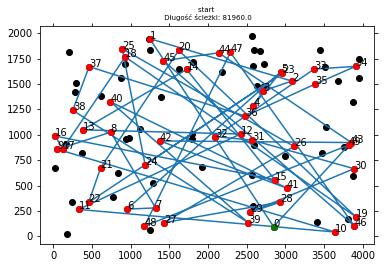

In [20]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[32, 4, 51, 77, 14, 58, 73, 91, 41, 79, 88, 55, 17, 78, 15, 21, 93, 35, 9, 89, 18, 64, 3, 0, 57, 60, 39, 53, 1, 43, 49, 84, 33, 28, 70, 45, 54, 82, 8, 97, 31, 44, 59, 61, 86, 50, 24, 72, 94, 75]
[32, 4, 51, 77, 14, 58, 73, 91, 41, 79, 88, 55, 17, 78, 15, 21, 93, 35, 9, 89, 18, 64, 3, 0, 57, 60, 39, 53, 1, 43, 49, 84, 33, 28, 70, 45, 54, 82, 8, 97, 31, 44, 59, 61, 86, 50, 24, 72, 94, 75]


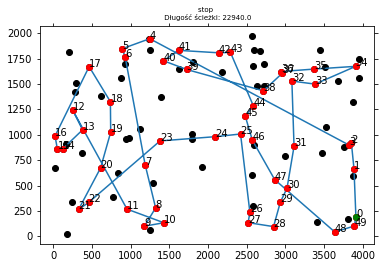

In [21]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [22]:
def find_lowest_cost_inner_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def inner_vertex_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs(path)
        cost, swaps = find_lowest_cost_inner_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_items_in_path((swap1, swap2), path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_steepest(path, distance_matrix2)

Elapsed time: 2.8533120155334473


[74, 3, 38, 58, 31, 36, 14, 93, 61, 69, 79, 84, 32, 81, 87, 88, 92, 8, 7, 77, 9, 29, 86, 16, 44, 82, 5, 4, 27, 72, 20, 41, 60, 90, 95, 98, 97, 64, 2, 71, 39, 48, 73, 59, 11, 70, 66, 26, 46, 23]
[74, 3, 38, 58, 31, 36, 14, 93, 61, 69, 79, 84, 32, 81, 87, 88, 92, 8, 7, 77, 9, 29, 86, 16, 44, 82, 5, 4, 27, 72, 20, 41, 60, 90, 95, 98, 97, 64, 2, 71, 39, 48, 73, 59, 11, 70, 66, 26, 46, 23]


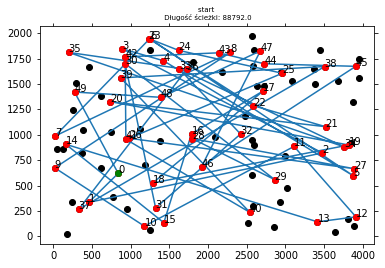

In [23]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[79, 3, 64, 69, 87, 16, 14, 5, 48, 74, 88, 39, 72, 60, 66, 27, 92, 86, 29, 77, 95, 38, 84, 8, 82, 70, 2, 4, 36, 32, 81, 97, 90, 73, 58, 98, 23, 93, 9, 71, 20, 31, 44, 59, 61, 26, 11, 46, 7, 41]
[79, 3, 64, 69, 87, 16, 14, 5, 48, 74, 88, 39, 72, 60, 66, 27, 92, 86, 29, 77, 95, 38, 84, 8, 82, 70, 2, 4, 36, 32, 81, 97, 90, 73, 58, 98, 23, 93, 9, 71, 20, 31, 44, 59, 61, 26, 11, 46, 7, 41]


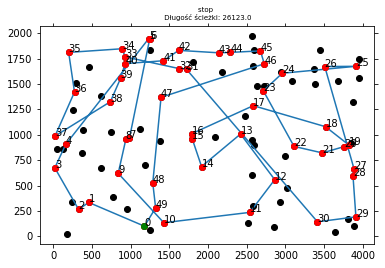

In [24]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [25]:
import itertools
def create_combs_between_two_lists(list1, list2):
    return list(itertools.product(list1, list2))

def calculate_edge_swap_cost_outer(swaps, path, distance_matrix):
    swap1, swap2, = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length(swap1, neighs, distance_matrix)
    after_cost = edge_length(swap2, neighs, distance_matrix)
    return after_cost - before_cost

def swap_item_value_in_list(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    path[index1]= swap2


In [85]:
@timing
def outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost_outer((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_greedy(path, rest, distance_matrix2)

stop [19, 24, 15, 62, 8, 65, 18, 69, 67, 32, 28, 40, 42, 27, 6, 35, 4, 12, 63, 87, 51, 44, 47, 22, 97, 53, 48, 81, 75, 16, 7, 56, 66, 11, 29, 68, 37, 89, 82, 99, 21, 17, 60, 71, 3, 93, 58, 0, 9, 74, 86, 26, 1, 84, 59, 61, 43, 50, 23, 2, 45, 90, 77, 83, 98, 80, 94, 79, 20, 49, 72, 73, 30, 25, 57, 96, 33, 92, 34, 31, 70, 41, 95, 52, 38, 76, 55, 54, 39, 64, 85, 91, 46, 5, 78, 36, 88, 14, 13, 10]
Elapsed time: 0.0


[19, 24, 15, 62, 8, 65, 18, 69, 67, 32, 28, 40, 42, 27, 6, 35, 4, 12, 63, 87, 51, 44, 47, 22, 97, 53, 48, 81, 75, 16, 7, 56, 66, 11, 29, 68, 37, 89, 82, 99, 21, 17, 60, 71, 3, 93, 58, 0, 9, 74, 86, 26, 1, 84, 59, 61, 43, 50, 23, 2, 45, 90, 77, 83, 98, 80, 94, 79, 20, 49, 72, 73, 30, 25, 57, 96, 33, 92, 34, 31, 70, 41, 95, 52, 38, 76, 55, 54, 39, 64, 85, 91, 46, 5, 78, 36, 88, 14, 13, 10]
[19, 24, 15, 62, 8, 65, 18, 69, 67, 32, 28, 40, 42, 27, 6, 35, 4, 12, 63, 87, 51, 44, 47, 22, 97, 53, 48, 81, 75, 16, 7, 56, 66, 11, 29, 68, 37, 89, 82, 99, 21, 17, 60, 71, 3, 93, 58, 0, 9, 74, 86, 26, 1, 84, 59, 61, 43, 50, 23, 2, 45, 90, 77, 83, 98, 80, 94, 79, 20, 49, 72, 73, 30, 25, 57, 96, 33, 92, 34, 31, 70, 41, 95, 52, 38, 76, 55, 54, 39, 64, 85, 91, 46, 5, 78, 36, 88, 14, 13, 10]


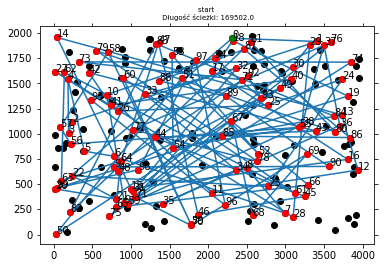

In [86]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[19, 24, 15, 62, 8, 65, 18, 69, 67, 32, 28, 40, 42, 27, 6, 35, 4, 12, 63, 87, 51, 44, 47, 22, 97, 53, 48, 81, 75, 16, 7, 56, 66, 11, 29, 68, 37, 89, 82, 99, 21, 17, 60, 71, 3, 93, 58, 0, 9, 74, 86, 26, 1, 84, 59, 61, 43, 50, 23, 2, 45, 90, 77, 83, 98, 80, 94, 79, 20, 49, 72, 73, 30, 25, 57, 96, 33, 92, 34, 31, 70, 41, 95, 52, 38, 76, 55, 54, 39, 64, 85, 91, 46, 5, 78, 36, 88, 14, 13, 10]
[19, 24, 15, 62, 8, 65, 18, 69, 67, 32, 28, 40, 42, 27, 6, 35, 4, 12, 63, 87, 51, 44, 47, 22, 97, 53, 48, 81, 75, 16, 7, 56, 66, 11, 29, 68, 37, 89, 82, 99, 21, 17, 60, 71, 3, 93, 58, 0, 9, 74, 86, 26, 1, 84, 59, 61, 43, 50, 23, 2, 45, 90, 77, 83, 98, 80, 94, 79, 20, 49, 72, 73, 30, 25, 57, 96, 33, 92, 34, 31, 70, 41, 95, 52, 38, 76, 55, 54, 39, 64, 85, 91, 46, 5, 78, 36, 88, 14, 13, 10]


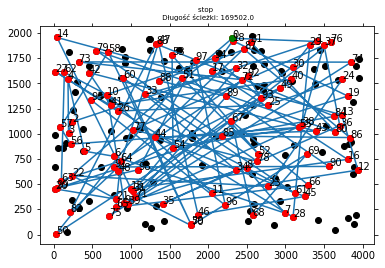

In [87]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [29]:
def edge_length_numpy(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost_outer_numpy(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length_numpy(swap1, neighs, distance_matrix)
    # zwroc after_cost edges
    after_cost = edge_length_numpy(swap2, neighs, distance_matrix)
    return after_cost - before_cost


def find_lowest_cost_outer_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        cost, swaps = find_lowest_cost_outer_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_steepest(path, rest, distance_matrix2)

stop [59, 61, 22, 31, 10, 14, 16, 89, 74, 55, 41, 7, 66, 57, 60, 80, 24, 68, 63, 39, 53, 43, 49, 72, 67, 8, 6, 82, 33, 45, 28, 13, 42, 2, 54, 11, 19, 97, 46, 62, 5, 48, 52, 15, 21, 87, 0, 92, 27, 76]
Elapsed time: 3.9125266075134277


[49, 19, 22, 12, 23, 44, 46, 80, 69, 30, 14, 79, 9, 98, 60, 32, 72, 39, 83, 68, 70, 1, 65, 7, 31, 8, 94, 66, 3, 45, 6, 77, 99, 48, 26, 18, 42, 4, 90, 37, 2, 91, 0, 58, 21, 95, 88, 86, 61, 10]
[49, 19, 22, 12, 23, 44, 46, 80, 69, 30, 14, 79, 9, 98, 60, 32, 72, 39, 83, 68, 70, 1, 65, 7, 31, 8, 94, 66, 3, 45, 6, 77, 99, 48, 26, 18, 42, 4, 90, 37, 2, 91, 0, 58, 21, 95, 88, 86, 61, 10]


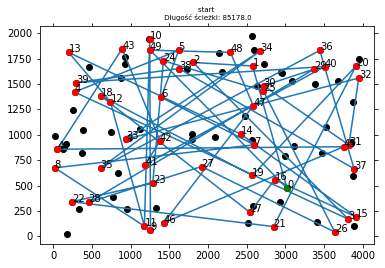

In [30]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[59, 61, 22, 31, 10, 14, 16, 89, 74, 55, 41, 7, 66, 57, 60, 80, 24, 68, 63, 39, 53, 43, 49, 72, 67, 8, 6, 82, 33, 45, 28, 13, 42, 2, 54, 11, 19, 97, 46, 62, 5, 48, 52, 15, 21, 87, 0, 92, 27, 76]
[59, 61, 22, 31, 10, 14, 16, 89, 74, 55, 41, 7, 66, 57, 60, 80, 24, 68, 63, 39, 53, 43, 49, 72, 67, 8, 6, 82, 33, 45, 28, 13, 42, 2, 54, 11, 19, 97, 46, 62, 5, 48, 52, 15, 21, 87, 0, 92, 27, 76]


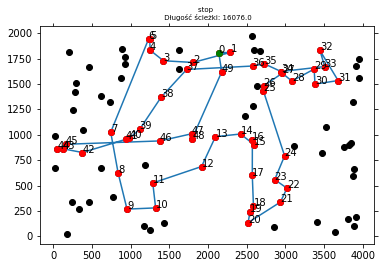

In [31]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [32]:


def edge_length_numpy(point, neigh, dm):
    new_length = dm[point, neigh].sum()
    return new_length


def get_edges(path):
    return [[path[d - 1], vertex] for d, vertex in enumerate(path)]


def get_edges_except(path):
    e = get_edges(path)
    return [
        item
        for item in itertools.combinations(e, 2)
        if len(set(itertools.chain(*item))) == 4
    ]


# print(get_edges([1,2,3]))


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]


def reverse_part_of_list(swap1, swap2, path):
    index_swap1 = path.index(swap1)
    index_swap2 = path.index(swap2)
    ix_min = index_swap1 if index_swap1 < index_swap2 else index_swap2
    ix_max = index_swap1 if index_swap1 > index_swap2 else index_swap2
    path[int(ix_min + 1) : ix_max] = path[int(ix_min + 1) : ix_max][::-1]


def calculate_cost_edge_greedy(edge1, edge2, distance_matrix):
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    # dodaj zwracanie new edges
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, swap1_1, swap2_0


@timing
def inner_edge_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        edges = get_edges_except(path)
        random.shuffle(edges)
        for (edge1, edge2) in edges:
            cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                edge1, edge2, distance_matrix
            )

            if cost < 0:
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True
                break

    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_greedy(path, distance_matrix2)

start [62, 33, 30, 57, 11, 28, 55, 29, 49, 41, 58, 85, 75, 59, 50, 14, 52, 42, 87, 53, 84, 47, 91, 78, 51, 21, 74, 76, 61, 63, 35, 95, 24, 19, 32, 4, 68, 60, 83, 22, 65, 40, 8, 77, 46, 16, 18, 26, 13, 70]
stop [47, 29, 84, 95, 77, 51, 4, 32, 75, 49, 53, 63, 68, 24, 50, 60, 57, 62, 91, 41, 30, 55, 74, 18, 65, 21, 87, 52, 78, 83, 35, 58, 16, 14, 46, 22, 76, 59, 61, 85, 26, 11, 19, 8, 33, 28, 42, 13, 40, 70]
Elapsed time: 0.4232349395751953


[62, 33, 30, 57, 11, 28, 55, 29, 49, 41, 58, 85, 75, 59, 50, 14, 52, 42, 87, 53, 84, 47, 91, 78, 51, 21, 74, 76, 61, 63, 35, 95, 24, 19, 32, 4, 68, 60, 83, 22, 65, 40, 8, 77, 46, 16, 18, 26, 13, 70]
[62, 33, 30, 57, 11, 28, 55, 29, 49, 41, 58, 85, 75, 59, 50, 14, 52, 42, 87, 53, 84, 47, 91, 78, 51, 21, 74, 76, 61, 63, 35, 95, 24, 19, 32, 4, 68, 60, 83, 22, 65, 40, 8, 77, 46, 16, 18, 26, 13, 70]


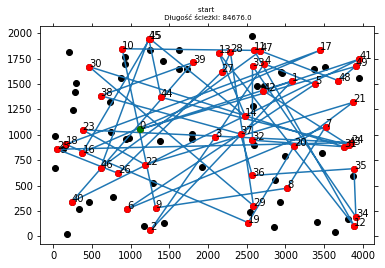

In [33]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[47, 29, 84, 95, 77, 51, 4, 32, 75, 49, 53, 63, 68, 24, 50, 60, 57, 62, 91, 41, 30, 55, 74, 18, 65, 21, 87, 52, 78, 83, 35, 58, 16, 14, 46, 22, 76, 59, 61, 85, 26, 11, 19, 8, 33, 28, 42, 13, 40, 70]
[47, 29, 84, 95, 77, 51, 4, 32, 75, 49, 53, 63, 68, 24, 50, 60, 57, 62, 91, 41, 30, 55, 74, 18, 65, 21, 87, 52, 78, 83, 35, 58, 16, 14, 46, 22, 76, 59, 61, 85, 26, 11, 19, 8, 33, 28, 42, 13, 40, 70]


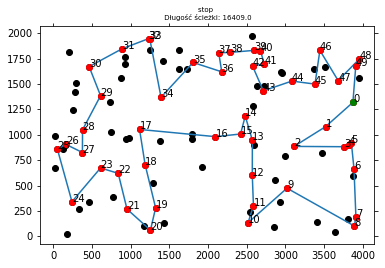

In [34]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [35]:

def find_lowest_cost_edge(edges, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1_1, swap2_0)

    return cost, swaps


@timing
def inner_edge_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        edges = get_edges_except(path)
        cost, (swap1_1, swap2_0) = find_lowest_cost_edge(edges, path, distance_matrix)
        if cost < 0:
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_steepest(path, distance_matrix2)

Elapsed time: 0.8636202812194824


[31, 35, 22, 52, 15, 93, 9, 38, 72, 70, 41, 50, 86, 81, 19, 44, 30, 45, 36, 48, 66, 16, 49, 40, 77, 32, 94, 42, 21, 12, 88, 3, 85, 69, 18, 99, 46, 17, 83, 68, 75, 87, 79, 76, 95, 91, 65, 25, 47, 28]
[31, 35, 22, 52, 15, 93, 9, 38, 72, 70, 41, 50, 86, 81, 19, 44, 30, 45, 36, 48, 66, 16, 49, 40, 77, 32, 94, 42, 21, 12, 88, 3, 85, 69, 18, 99, 46, 17, 83, 68, 75, 87, 79, 76, 95, 91, 65, 25, 47, 28]


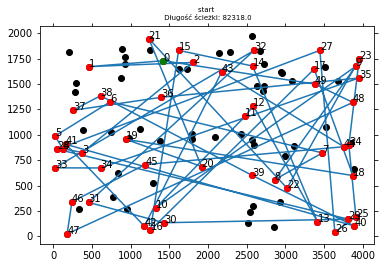

In [36]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[86, 50, 19, 85, 76, 22, 44, 16, 31, 46, 91, 48, 18, 52, 9, 83, 35, 17, 93, 87, 15, 21, 69, 65, 25, 3, 79, 30, 88, 41, 66, 68, 72, 49, 38, 81, 94, 12, 75, 32, 36, 95, 77, 47, 99, 70, 40, 42, 45, 28]
[86, 50, 19, 85, 76, 22, 44, 16, 31, 46, 91, 48, 18, 52, 9, 83, 35, 17, 93, 87, 15, 21, 69, 65, 25, 3, 79, 30, 88, 41, 66, 68, 72, 49, 38, 81, 94, 12, 75, 32, 36, 95, 77, 47, 99, 70, 40, 42, 45, 28]


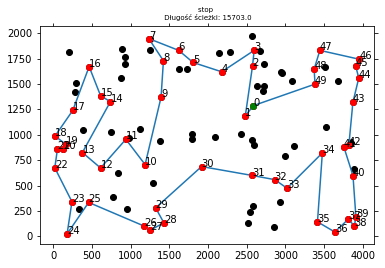

In [37]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [38]:
@timing
def hehe(num):
    for _ in range(num):
        pass
    return [1, 2]


hehe(100000)

Elapsed time: 0.0009968280792236328


(1, 2, 0.0009968280792236328)

In [39]:
# inner_and_outer_vertex_greedy greedy
@timing
def inner_and_outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        all_combined = possible_moves_inner + possible_moves_outer
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves_inner:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
                if cost < 0:
                    swap_items_in_path((swap1, swap2), path)
                    better = True
                    break
            if item in possible_moves_outer:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 4.352233171463013


[84, 43, 16, 31, 15, 36, 8, 26, 27, 9, 75, 69, 21, 67, 60, 47, 55, 83, 86, 78, 77, 90, 24, 89, 76, 22, 14, 70, 85, 88, 17, 91, 1, 2, 46, 12, 53, 32, 79, 44, 54, 87, 97, 38, 51, 30, 13, 72, 59, 33]
[84, 43, 16, 31, 15, 36, 8, 26, 27, 9, 75, 69, 21, 67, 60, 47, 55, 83, 86, 78, 77, 90, 24, 89, 76, 22, 14, 70, 85, 88, 17, 91, 1, 2, 46, 12, 53, 32, 79, 44, 54, 87, 97, 38, 51, 30, 13, 72, 59, 33]


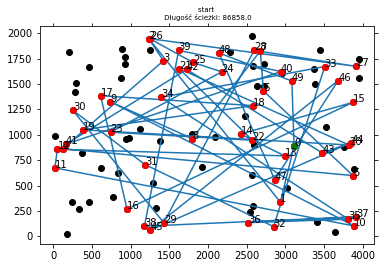

In [40]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[79, 41, 66, 60, 50, 86, 8, 56, 92, 91, 74, 18, 52, 89, 48, 0, 27, 57, 24, 29, 77, 95, 38, 84, 6, 54, 82, 33, 45, 2, 28, 67, 49, 43, 39, 63, 68, 80, 22, 97, 59, 61, 85, 26, 19, 76, 62, 5, 96, 55]
[79, 41, 66, 60, 50, 86, 8, 56, 92, 91, 74, 18, 52, 89, 48, 0, 27, 57, 24, 29, 77, 95, 38, 84, 6, 54, 82, 33, 45, 2, 28, 67, 49, 43, 39, 63, 68, 80, 22, 97, 59, 61, 85, 26, 19, 76, 62, 5, 96, 55]


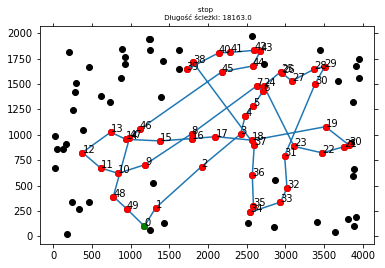

In [41]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs(path)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_items_in_path((swap1, swap2), path)
                better = True
        if choice == 1:
            possible_moves = create_combs_between_two_lists(path, rest)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

In [42]:
# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        cost_inner, swaps_inner = find_lowest_cost_inner_steepest(
            possible_moves_inner, path, distance_matrix
        )

        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(
            possible_moves_outer, path, distance_matrix
        )

        if cost_inner < cost_outer and cost_inner < 0:
            swap1, swap2 = swaps_inner
            swap_items_in_path((swap1, swap2), path)
            better = True

        if cost_outer <= cost_inner and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

Elapsed time: 11.58598256111145


[88, 21, 1, 33, 2, 17, 91, 18, 98, 97, 63, 20, 6, 54, 89, 44, 60, 50, 84, 7, 16, 83, 25, 39, 32, 5, 94, 8, 62, 28, 27, 77, 31, 87, 76, 38, 51, 71, 52, 57, 69, 95, 48, 73, 74, 75, 58, 47, 93, 0]
[88, 21, 1, 33, 2, 17, 91, 18, 98, 97, 63, 20, 6, 54, 89, 44, 60, 50, 84, 7, 16, 83, 25, 39, 32, 5, 94, 8, 62, 28, 27, 77, 31, 87, 76, 38, 51, 71, 52, 57, 69, 95, 48, 73, 74, 75, 58, 47, 93, 0]


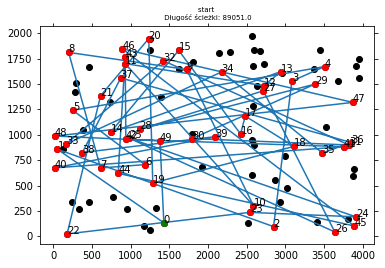

In [43]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[96, 55, 41, 7, 91, 5, 48, 89, 78, 83, 44, 59, 61, 19, 6, 8, 86, 80, 24, 60, 57, 66, 68, 72, 49, 12, 32, 36, 38, 84, 67, 50, 76, 22, 97, 90, 31, 10, 20, 71, 9, 62, 46, 0, 74, 18, 21, 15, 87, 52]
[96, 55, 41, 7, 91, 5, 48, 89, 78, 83, 44, 59, 61, 19, 6, 8, 86, 80, 24, 60, 57, 66, 68, 72, 49, 12, 32, 36, 38, 84, 67, 50, 76, 22, 97, 90, 31, 10, 20, 71, 9, 62, 46, 0, 74, 18, 21, 15, 87, 52]


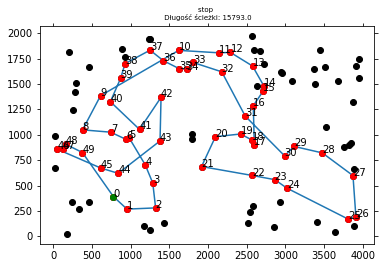

In [44]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs_between_two_lists(path, rest)
            random.shuffle(possible_moves)
            for (swap1, swap2) in possible_moves:
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
        if choice == 1:
            edges = get_edges_except(path)
            random.shuffle(edges)
            for (edge1, edge2) in edges:
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break
    return start_path, path


print()
e = [([4, 1], [2, 3])]
z = get_edges_except([1, 2, 3, 4])[0]
if (4, 1) in e:
    print(z)
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

In [88]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False

        possible_moves = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)
        all_combined = possible_moves + edges
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
            if item in edges:
                (edge1, edge2) = item
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break

    return start_path, path


path, rest = create_random_vertexes(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 5.26146936416626


[79, 49, 75, 88, 5, 44, 25, 69, 0, 62, 14, 81, 74, 47, 57, 70, 64, 16, 19, 76, 92, 41, 85, 45, 13, 43, 82, 28, 83, 78, 61, 11, 42, 18, 86, 87, 30, 71, 94, 1, 97, 95, 21, 99, 6, 15, 2, 51, 29, 24, 56, 91, 50, 32, 26, 98, 93, 7, 23, 60, 46, 65, 8, 37, 89, 53, 55, 17, 40, 12, 59, 80, 3, 48, 39, 58, 35, 33, 77, 54, 20, 84, 52, 10, 67, 27, 72, 73, 63, 38, 9, 66, 31, 22, 96, 68, 36, 4, 34, 90]
[79, 49, 75, 88, 5, 44, 25, 69, 0, 62, 14, 81, 74, 47, 57, 70, 64, 16, 19, 76, 92, 41, 85, 45, 13, 43, 82, 28, 83, 78, 61, 11, 42, 18, 86, 87, 30, 71, 94, 1, 97, 95, 21, 99, 6, 15, 2, 51, 29, 24, 56, 91, 50, 32, 26, 98, 93, 7, 23, 60, 46, 65, 8, 37, 89, 53, 55, 17, 40, 12, 59, 80, 3, 48, 39, 58, 35, 33, 77, 54, 20, 84, 52, 10, 67, 27, 72, 73, 63, 38, 9, 66, 31, 22, 96, 68, 36, 4, 34, 90]


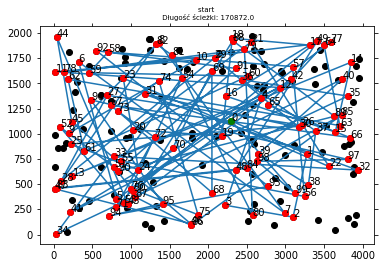

In [46]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[22, 34, 1, 67, 29, 76, 79, 64, 30, 46, 5, 53, 74, 21, 97, 57, 33, 89, 24, 16, 7, 41, 54, 19, 63, 66, 78, 12, 14, 84, 0, 52, 23, 31, 45, 28, 17, 36, 60, 25, 6, 81, 77, 8, 15, 50, 62, 43, 65, 47, 83, 10, 51, 86, 95, 96, 80, 44, 32, 99, 73, 56, 35, 9, 91, 18, 98, 92, 48, 11, 39, 26, 59, 3, 13, 68, 2, 72, 58, 40, 88, 20, 69, 75, 93, 94, 85, 4, 42, 55, 70, 37, 27, 87, 38, 71, 82, 61, 49, 90]
[22, 34, 1, 67, 29, 76, 79, 64, 30, 46, 5, 53, 74, 21, 97, 57, 33, 89, 24, 16, 7, 41, 54, 19, 63, 66, 78, 12, 14, 84, 0, 52, 23, 31, 45, 28, 17, 36, 60, 25, 6, 81, 77, 8, 15, 50, 62, 43, 65, 47, 83, 10, 51, 86, 95, 96, 80, 44, 32, 99, 73, 56, 35, 9, 91, 18, 98, 92, 48, 11, 39, 26, 59, 3, 13, 68, 2, 72, 58, 40, 88, 20, 69, 75, 93, 94, 85, 4, 42, 55, 70, 37, 27, 87, 38, 71, 82, 61, 49, 90]


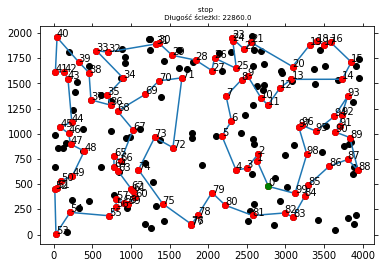

In [89]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [48]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(possible_moves_outer, path, distance_matrix)
        
        edges = get_edges_except(path)
        cost_edges, swaps_edge  = find_lowest_cost_edge(
            edges, path, distance_matrix
        )
            
        if cost_outer < cost_edges and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
            
        if cost_edges <= cost_outer and cost_edges < 0:
            (swap1_1, swap2_0) = swaps_edge
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True
            
    return start_path, path


path, rest = create_random_vertexes(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 11.095997095108032


[25, 60, 31, 23, 45, 28, 17, 48, 92, 98, 13, 59, 3, 11, 39, 52, 0, 84, 26, 14, 12, 78, 66, 30, 46, 54, 63, 19, 41, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 49, 71, 82, 61, 53, 5, 64, 79, 76, 29, 67, 1, 34, 22, 90, 94, 93, 75, 69, 20, 88, 40, 58, 72, 2, 68, 73, 56, 35, 99, 32, 80, 96, 44, 9, 91, 18, 65, 47, 95, 86, 51, 10, 83, 43, 62, 50, 15, 36, 8, 77, 81, 6]
[25, 60, 31, 23, 45, 28, 17, 48, 92, 98, 13, 59, 3, 11, 39, 52, 0, 84, 26, 14, 12, 78, 66, 30, 46, 54, 63, 19, 41, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 49, 71, 82, 61, 53, 5, 64, 79, 76, 29, 67, 1, 34, 22, 90, 94, 93, 75, 69, 20, 88, 40, 58, 72, 2, 68, 73, 56, 35, 99, 32, 80, 96, 44, 9, 91, 18, 65, 47, 95, 86, 51, 10, 83, 43, 62, 50, 15, 36, 8, 77, 81, 6]


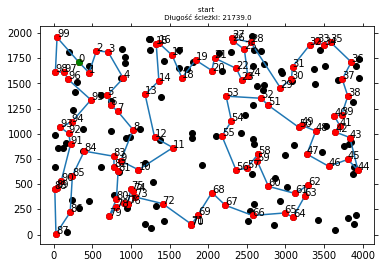

In [49]:
a = create_plot(stop_path, lat, lon, "start", distance_matrix)

[25, 60, 31, 23, 45, 28, 17, 48, 92, 98, 13, 59, 3, 11, 39, 52, 0, 84, 26, 14, 12, 78, 66, 30, 46, 54, 63, 19, 41, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 49, 71, 82, 61, 53, 5, 64, 79, 76, 29, 67, 1, 34, 22, 90, 94, 93, 75, 69, 20, 88, 40, 58, 72, 2, 68, 73, 56, 35, 99, 32, 80, 96, 44, 9, 91, 18, 65, 47, 95, 86, 51, 10, 83, 43, 62, 50, 15, 36, 8, 77, 81, 6]
[25, 60, 31, 23, 45, 28, 17, 48, 92, 98, 13, 59, 3, 11, 39, 52, 0, 84, 26, 14, 12, 78, 66, 30, 46, 54, 63, 19, 41, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 49, 71, 82, 61, 53, 5, 64, 79, 76, 29, 67, 1, 34, 22, 90, 94, 93, 75, 69, 20, 88, 40, 58, 72, 2, 68, 73, 56, 35, 99, 32, 80, 96, 44, 9, 91, 18, 65, 47, 95, 86, 51, 10, 83, 43, 62, 50, 15, 36, 8, 77, 81, 6]


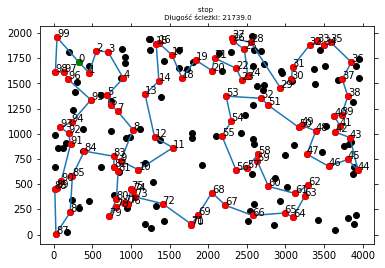

In [50]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [51]:
@timing
def random_solution(path, time, distance_matrix):
    from datetime import datetime, timedelta

    to_return = []
    path_len = 999999999999999
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        full_path = path + [path[0]]
        curr_len = calculate_path_length(full_path, distance_matrix)
        if curr_len < path_len:
            path_len = curr_len
            to_return = path
        random.shuffle(path)

    return to_return, path_len

# with open("paths.txt", "r") as file:
#     data = file.readlines()


# def testtest(program, time, title):
#     final_scores = []

#     for ix, items in enumerate(data):
#         path = [int(item) for item in items.split()]
#         lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
#         distance_matrix = calc_matrix(lat, lon)
#         stop_path, lengh, diff = program(path, time, distance_matrix)
#         final_path = stop_path + [stop_path[0]]
#         path_len = calculate_path_length(final_path, distance_matrix)

#         scores = [diff, path_len, final_path]
#         final_scores.append(scores)
#     df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
#     df["Time"] = df["Time"].astype("float")
#     df["PathLen"] = df["PathLen"].astype("float")
#     df["FinalPath"] = df["FinalPath"].astype("object")
#     display(df)
#     display(df.describe())
#     df.to_csv(title)
#     return True

# testtest(random_solution, 4.61, "randomsolb")
# c = pd.read_csv("randomsolb")
# display(c[c["PathLen"] == c["PathLen"].min()])
# display(c.describe())
with open("paths.txt", "r") as file:
    data = file.readlines()


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


kroa
test(inner_and_outer_vertex_steepest, "test")
test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob")
test(inner_and_outer_vertex_steepest, "inner_and_outer_vertex_steepestkrob")
test(inner_and_outer_vertex_greedy, "inner_and_outer_vertex_greedykrob")
test(outer_vertex_inner_edge_greedy, "outer_vertex_inner_edge_greedykrob")
c = pd.read_csv("inner_and_outer_vertex_greedykrob")


In [52]:
import operator
from itertools import chain

def create_steepest_ranking_outer_vertex(possible_moves_outer, path,rest, distance_matrix):
    ranking = []
    for (swap1, swap2) in possible_moves_outer:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < 0:
            p = get_neighs(swap1, path)
            r = get_neighs(swap2,rest)
            n = [p, r, (swap1, swap2)]
            to_delete = list(set(list(chain(*n))))
            l = ["vertex", (swap1, swap2), current_cost, to_delete]
            ranking.append(l)

    return ranking

def create_steepest_ranking_edge(edges, path, distance_matrix):
    ranking = []
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < 0:
            a = get_neighs(edge1[0], path)
            b = get_neighs(edge1[1], path)
            c = get_neighs(edge2[0], path)
            d = get_neighs(edge2[1], path)
            n = [a,b,c,d]
            to_delete = list(set(list(chain(*n))))
            l = ["edge", (swap1_1, swap2_0), current_cost, to_delete]
            ranking.append(l)

    return ranking


# outer vertex inner edge
@timing
def new_outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    
    whole_ranking = []
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)        
        edges = get_edges_except(path)
        
        existing_moves_vertex = [item[1] for item in whole_ranking if item[0] == "vertex"]
        existing_moves_edge = [item[1] for item in whole_ranking if item[0] == "edge"]
        
        new_possible_moves_outer = [item for item in possible_moves_outer if item not in existing_moves_vertex]
        new_edges = [item for item in edges if item not in existing_moves_edge]
        
        vertex_ranking = create_steepest_ranking_outer_vertex(new_possible_moves_outer, path, rest, distance_matrix)
        edge_ranking = create_steepest_ranking_edge(new_edges, path, distance_matrix)
        
        whole_ranking += vertex_ranking
        whole_ranking += edge_ranking
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(2))   
        
        if len(whole_ranking) > 0:
            _type, swaps, cost, to_delete = whole_ranking[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

            temp = whole_ranking.copy()
            for ix, items in enumerate(whole_ranking):
                for check in items[1]:
                    if check in to_delete:
                        temp.remove(items)
                        break
        
            whole_ranking = temp
        
    return start_path, path


path, rest = create_random_vertexes(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 153.09765338897705


[58, 72, 2, 68, 40, 29, 67, 76, 59, 3, 13, 98, 18, 65, 91, 9, 35, 56, 73, 99, 32, 44, 80, 96, 95, 86, 51, 10, 83, 47, 43, 62, 50, 15, 8, 77, 81, 6, 25, 31, 23, 60, 36, 28, 45, 17, 48, 92, 11, 39, 52, 0, 84, 26, 14, 12, 78, 63, 19, 41, 54, 66, 30, 46, 5, 53, 64, 79, 1, 34, 22, 49, 71, 82, 61, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 94, 93, 90, 75, 69, 20, 88]
[58, 72, 2, 68, 40, 29, 67, 76, 59, 3, 13, 98, 18, 65, 91, 9, 35, 56, 73, 99, 32, 44, 80, 96, 95, 86, 51, 10, 83, 47, 43, 62, 50, 15, 8, 77, 81, 6, 25, 31, 23, 60, 36, 28, 45, 17, 48, 92, 11, 39, 52, 0, 84, 26, 14, 12, 78, 63, 19, 41, 54, 66, 30, 46, 5, 53, 64, 79, 1, 34, 22, 49, 71, 82, 61, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 94, 93, 90, 75, 69, 20, 88]


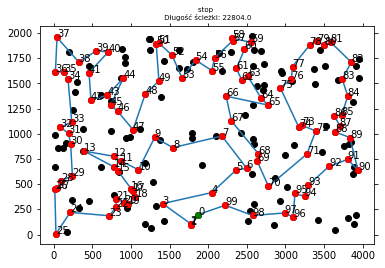

In [53]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 4.645283222198486
[69, 20, 58, 68, 73, 56, 35, 99, 32, 44, 9, 91, 65, 15, 77, 8, 36, 17, 48, 92, 3, 59, 11, 39, 84, 26, 14, 78, 19, 63, 54, 46, 5, 53, 61, 82, 21, 7, 97, 87, 27, 38, 37, 70, 71, 49, 94, 93, 90, 75]
[69, 20, 58, 68, 73, 56, 35, 99, 32, 44, 9, 91, 65, 15, 77, 8, 36, 17, 48, 92, 3, 59, 11, 39, 84, 26, 14, 78, 19, 63, 54, 46, 5, 53, 61, 82, 21, 7, 97, 87, 27, 38, 37, 70, 71, 49, 94, 93, 90, 75]


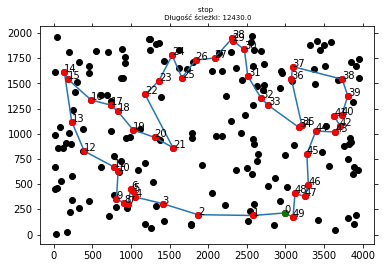

In [54]:
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

def find_n_closest_neigh(neigh, distance_matrix, k):
    return np.argsort(distance_matrix[:, neigh])[:k]


def get_new_edges_after_vertex_swap(swaps, path):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    return [(swap2, neighs[0]), (swap2, neighs[1])]


def get_new_edges_after_edges_swap(swaps):
    edge1, edge2 = swaps
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    return [(swap1_0, swap2_0), (swap1_1, swap2_1)]


@timing
def candidate_moves(path, rest, distance_matrix):
    better = True
    start_path = path.copy()

    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)

        possible_moves_outer_new_edges_created = list(
            itertools.chain(
                *[
                    get_new_edges_after_vertex_swap(item, path)
                    for item in possible_moves_outer
                ]
            )
        )
        edges_new_edges_created = list(
            itertools.chain(*[get_new_edges_after_edges_swap(item) for item in edges])
        )

        candidates = []
        for n1 in range(200):
            for n2 in find_n_closest_neigh(n1, distance_matrix, 5):
                if (n1, n2) in edges_new_edges_created:
                    ix = int(edges_new_edges_created.index((n1, n2)) / 2)
                    e = edges[ix]
                    cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                        e[0], e[1], distance_matrix
                    )
                    if cost < 0:
                        c = ["edge", (swap1_1, swap2_0), cost]
                        candidates.append(c)
                if (n1, n2) in possible_moves_outer_new_edges_created:
                    ix = int(possible_moves_outer_new_edges_created.index((n1, n2)) / 2)
                    e = possible_moves_outer[ix]
                    cost = calculate_edge_swap_cost_outer_numpy(
                        e, path, distance_matrix
                    )
                    if cost < 0:
                        c = ["vertex", e, cost]
                        candidates.append(c)

        candidates = sorted(candidates, key=operator.itemgetter(2))
        if len(candidates) > 0:
            _type, swaps, cost = candidates[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

    return start_path, path


def create_random_vertexes2(number_of_samples):
    l = [int(i) for i in range(0, 200)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = candidate_moves(path, rest, distance_matrix2)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

path, rest = create_random_vertexes2(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

import random

def new_get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    return np.argsort(distance_matrix[:, idx])[:num]

@timing
def new_tsp_nn(d, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 199)

    tsp_outcome = [selected_vertex]
    
    for _ in range(int((d.shape[0] / 2) - 1)):
        
        # find minimum in column
        ix_min = int(np.argmin(d[:,selected_vertex]))
        
        # push min to outcome
        tsp_outcome.append(ix_min)
#         test_display.append(tsp_outcome.copy())
        # set distance to 0
        
        d[:, selected_vertex] = np.inf
        d[selected_vertex] = np.inf
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
#     test_display[-1].append(test_display[-1][0])
    return tsp_outcome, 1

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_tsp_nn(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(start_path, lat, lon, "stop", distance_matrix)


paths = []
for _ in range(100):
    path, _ = create_random_vertexes2(100)
    if path not in paths:
        paths.append(path)

with open("paths.txt", "w") as file:
    for line in paths[:100]:
        file.write(" ".join([str(i) for i in line]))
        file.write("\n")

with open("paths.txt", "r") as file:
    data = file.readlines()


def testzad1(title):
    final_scores = []

    for _ in range(50):
        lat, lon = get_lat_lon_from_url(target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        d = distance_matrix.to_numpy()
        #         start = time()
        tsp, d, time = new_tsp_nn(d)
        #         end = time()
        #         diff = end - start
        #         print(tsp)
        final_path = tsp
        distance_matrix = calc_matrix(lat, lon)
        #         display(distance_matrix)
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [time, path_len, final_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data[:5]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


# testzad1("new_tsp_nnkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(
#     new_outer_vertex_inner_edge_steepest, "new_outer_vertex_inner_edge_steepestkroa200"
# )
# test(candidate_moves, "candidate_moveskrob200")

In [ ]:
c = pd.read_csv("candidate_moveskrob200")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot(
    p,
    lat,
    lon,
    "Algorytm stromy ruchy kandydackie - krob200",
    distance_matrix,
)

# LAB 4

In [56]:
def create_random_vertexes2(number_of_samples):
    l = [int(i) for i in range(0, 200)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest

In [57]:
#candidate
def find_n_closest_neigh(neigh, distance_matrix, k):
    return np.argsort(distance_matrix[:, neigh])[:k]

def my_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def outer_vertex_swap_cost(swaps, path, distance_matrix):
    current_cost = calculate_edge_swap_cost_outer_numpy(
            swaps, path, distance_matrix
        )
    return current_cost, swaps

def edge_swap_cost_cands(e, distance_matrix):
    edge1 = e[0]
    edge2 = e[1]
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, (swap1_1, swap2_0)

@timing
def cands(path, rest, distance_matrix, n_cands = 5, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = path.copy()
    if shuffle:
        random.shuffle(shuffled_list)
    
    
    for v1 in shuffled_list:
        v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
        moves = []

        for v2 in neigh_info[v1]:            
            if v2 in path:
                v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
            else:
                moves.append(["V", (v1_left_neigh,v2)])
                moves.append(["V", (v1_right_neigh,v2)])
    

        whole_ranking = []
        for move in moves:
            if move[0] == "V":
                whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
            if move[0] == "E":
                whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
        print(whole_ranking)
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
        print(whole_ranking[0])
        _type, cost, swaps = whole_ranking[0]
        if cost < 0:
            if _type == "V":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "E":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
            
    return start_path, path
# path, rest = create_random_vertexes2(100)
# lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
# distance_matrix = calc_matrix(lat, lon)
# distance_matrix2 = distance_matrix.to_numpy()
# start_path, stop_path, diff = cands(
# path, rest, distance_matrix2
# )
# distance_matrix = calc_matrix(lat, lon)
# a = create_plot(start_path, lat, lon, "stop", distance_matrix)

p [114, 188, 182, 51, 27, 177, 121, 5, 103, 22, 52, 106, 160, 66, 53, 41, 67, 61, 73, 2, 190, 23, 24, 112, 142, 124, 196, 108, 19, 193, 141, 15, 57, 1, 7, 170, 95, 137, 79, 174, 76, 89, 139, 30, 56, 80, 195, 157, 58, 35, 6, 138, 194, 100, 68, 96, 111, 11, 83, 92, 167, 154, 191, 77, 153, 13, 28, 70, 63, 198, 38, 123, 42, 159, 163, 125, 109, 44, 4, 99, 164, 147, 40, 171, 130, 43, 75, 192, 60, 199, 90, 150, 29, 59, 32, 152, 140, 39, 94, 9]
p [114, 188, 182, 51, 27, 177, 121, 5, 103, 22, 52, 106, 160, 66, 53, 41, 67, 61, 73, 2, 190, 23, 24, 112, 142, 124, 196, 108, 19, 193, 141, 15, 57, 1, 7, 170, 95, 137, 79, 174, 76, 89, 139, 30, 56, 80, 195, 157, 58, 35, 6, 138, 194, 100, 68, 96, 111, 11, 83, 92, 167, 154, 191, 77, 153, 13, 28, 70, 63, 198, 38, 123, 42, 159, 163, 125, 109, 44, 4, 99, 164, 147, 40, 171, 130, 43, 75, 192, 60, 199, 90, 150, 29, 59, 32, 152, 140, 39, 94, 9]
1 57 7
[['V', (57, 34)], ['V', (7, 34)], ['V', (57, 180)], ['V', (7, 180)], ['E', ([1, 7], [124, 196])], ['E', ([57, 1

[['V', -772.0, (171, 3)], ['E', -571.0, (162, 39)], ['E', -533.0, (11, 92)], ['V', 20.0, (11, 3)], ['E', 39.0, (162, 164)], ['E', 197.0, (162, 105)], ['E', 264.0, (11, 105)], ['E', 332.0, (162, 191)], ['E', 352.0, (11, 148)], ['E', 417.0, (11, 100)]]
p [114, 110, 109, 146, 39, 92, 185, 41, 53, 108, 5, 186, 177, 27, 159, 161, 19, 59, 154, 71, 138, 194, 29, 168, 90, 9, 22, 163, 88, 72, 58, 2, 40, 195, 4, 52, 66, 160, 106, 192, 54, 63, 17, 28, 13, 38, 34, 124, 173, 24, 16, 142, 120, 188, 10, 51, 164, 105, 148, 98, 149, 60, 137, 123, 191, 100, 68, 141, 130, 65, 152, 76, 157, 79, 156, 46, 61, 73, 35, 6, 187, 62, 50, 15, 180, 1, 7, 32, 155, 99, 37, 80, 44, 3, 162, 11, 48, 103, 196, 30]
163 22 88
[['V', (22, 139)], ['V', (88, 139)], ['V', (22, 20)], ['V', (88, 20)], ['V', (22, 153)], ['V', (88, 153)], ['E', ([163, 88], [22, 163])], ['E', ([22, 163], [9, 22])], ['E', ([163, 88], [168, 90])], ['E', ([22, 163], [29, 168])]]
[['V', -381.0, (22, 139)], ['V', -303.0, (22, 20)], ['V', -277.0, (22, 1

[114, 110, 109, 146, 39, 92, 192, 59, 19, 161, 159, 27, 177, 195, 70, 52, 66, 160, 106, 154, 71, 138, 194, 181, 168, 67, 9, 139, 163, 88, 72, 58, 2, 40, 186, 53, 108, 5, 41, 185, 54, 63, 17, 28, 13, 38, 34, 15, 180, 1, 7, 32, 155, 30, 196, 105, 148, 98, 149, 60, 137, 35, 43, 187, 62, 50, 124, 142, 16, 24, 173, 120, 188, 130, 141, 68, 100, 191, 123, 73, 61, 46, 156, 79, 157, 76, 152, 65, 10, 51, 164, 103, 48, 11, 162, 3, 44, 80, 37, 99]
[114, 110, 109, 146, 39, 92, 192, 59, 19, 161, 159, 27, 177, 195, 70, 52, 66, 160, 106, 154, 71, 138, 194, 181, 168, 67, 9, 139, 163, 88, 72, 58, 2, 40, 186, 53, 108, 5, 41, 185, 54, 63, 17, 28, 13, 38, 34, 15, 180, 1, 7, 32, 155, 30, 196, 105, 148, 98, 149, 60, 137, 35, 43, 187, 62, 50, 124, 142, 16, 24, 173, 120, 188, 130, 141, 68, 100, 191, 123, 73, 61, 46, 156, 79, 157, 76, 152, 65, 10, 51, 164, 103, 48, 11, 162, 3, 44, 80, 37, 99]


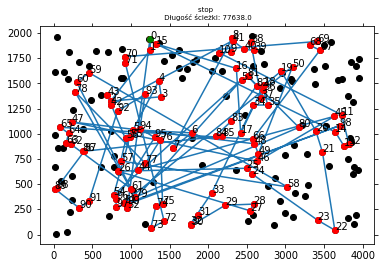

In [58]:
@timing
def cands(path, rest, distance_matrix, n_cands = 5, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = [i for i in range(0, len(distance_matrix))]
    if shuffle:
        random.shuffle(shuffled_list)
    moves = []
    
    for v1 in shuffled_list:
        print("p", path)
        if v1 in path:
            v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
            print(v1, v1_left_neigh, v1_right_neigh)
            for v2 in neigh_info[v1]:            
                if v2 in path:
                    v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                    moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                    moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
                else:
                    moves.append(["V", (v1_left_neigh,v2)])
                    moves.append(["V", (v1_right_neigh,v2)])

            print(moves)
            whole_ranking = []
            for move in moves:
                if move[0] == "V":
                    whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
                if move[0] == "E":
                    whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
            whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
            print(whole_ranking)
            
#             print(whole_ranking[0])
            _type, cost, swaps = whole_ranking[0]
            if cost < 0:
                if _type == "V":
                    swap1, swap2 = swaps
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True

                if _type == "E":
                    (swap1_1, swap2_0) = swaps
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                moves = []
                
#             if v1 not in path:
#                 break
            
    return start_path, path
path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = cands(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

[62, 50, 117, 137, 123, 178, 187, 115, 83, 10, 51, 164, 165, 48, 45, 171, 120, 23, 31, 25, 77, 8, 92, 162, 3, 148, 105, 189, 18, 13, 174, 9, 73, 35, 32, 99, 155, 179, 188, 72, 2, 40, 191, 100, 176, 161, 19, 63, 134, 185, 142, 154, 111, 119, 53, 61, 184, 129, 37, 27, 97, 113, 128, 21, 74, 168, 163, 88, 166, 192, 26, 197, 122, 190, 84, 110, 0, 186, 5, 108, 133, 151, 177, 195, 138, 90, 149, 167, 157, 76, 160, 150, 156, 46, 30, 66, 78, 144, 65, 152]
[62, 50, 117, 137, 123, 178, 187, 115, 83, 10, 51, 164, 165, 48, 45, 171, 120, 23, 31, 25, 77, 8, 92, 162, 3, 148, 105, 189, 18, 13, 174, 9, 73, 35, 32, 99, 155, 179, 188, 72, 2, 40, 191, 100, 176, 161, 19, 63, 134, 185, 142, 154, 111, 119, 53, 61, 184, 129, 37, 27, 97, 113, 128, 21, 74, 168, 163, 88, 166, 192, 26, 197, 122, 190, 84, 110, 0, 186, 5, 108, 133, 151, 177, 195, 138, 90, 149, 167, 157, 76, 160, 150, 156, 46, 30, 66, 78, 144, 65, 152]


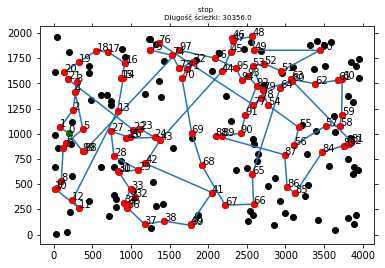

In [59]:
# @timing
def cands_best(path, rest, distance_matrix, n_cands = 10, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = [i for i in range(0, len(distance_matrix))]
    if shuffle:
        random.shuffle(shuffled_list)
    moves = []
    
    for v1 in shuffled_list:
#         print("p", path)
        for v2 in neigh_info[v1]:            
            if v1 in path and v2 in path:
                v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
                v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
            elif v1 in path or v2 in path:
                v_inpath = v1 if v1 in path else v2
                v_outpath = v1 if v2==v_inpath else v2
                v_left_neigh, v_right_neigh = my_neighs(v_inpath, path)
                moves.append(["V", (v_left_neigh,v_outpath)])
                moves.append(["V", (v_right_neigh,v_outpath)])
            
#         print(moves)
        whole_ranking = []
        for move in moves:
            if move[0] == "V":
                whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
            if move[0] == "E":
                whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
#         print(whole_ranking)

#             print(whole_ranking[0])
        if len(whole_ranking) > 0:
            _type, cost, swaps = whole_ranking[0]
            if cost < 0:
                if _type == "V":
                    swap1, swap2 = swaps
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True

                if _type == "E":
                    (swap1_1, swap2_0) = swaps
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                moves = []

#             if v1 not in path:
#                 break
            
    return start_path, path,_
path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = cands_best(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [60]:
def calculate_path_length_numpy(path, distance_matrix_numpy):
    new_path = path.copy()
    new_path.append(new_path[0])
    return sum([
        edge_length_numpy(x,y,distance_matrix_numpy) for (x,y) in get_combs(new_path)
    ])

18.28325867652893
[76, 157, 192, 127, 79, 5, 53, 172, 143, 75, 90, 138, 85, 195, 177, 151, 55, 27, 102, 113, 38, 70, 129, 21, 133, 16, 89, 24, 142, 106, 182, 154, 7, 108, 46, 30, 78, 159, 161, 54, 119, 126, 134, 41, 185, 82, 71, 61, 180, 1, 34, 67, 20, 153, 139, 163, 58, 2, 17, 109, 48, 189, 65, 118, 91, 174, 9, 98, 148, 105, 92, 171, 120, 173, 158, 116, 114, 84, 190, 26, 100, 191, 13, 35, 44, 73, 155, 96, 80, 196, 56, 36, 137, 77, 81, 8, 117, 15, 62, 178]
[76, 157, 192, 127, 79, 5, 53, 172, 143, 75, 90, 138, 85, 195, 177, 151, 55, 27, 102, 113, 38, 70, 129, 21, 133, 16, 89, 24, 142, 106, 182, 154, 7, 108, 46, 30, 78, 159, 161, 54, 119, 126, 134, 41, 185, 82, 71, 61, 180, 1, 34, 67, 20, 153, 139, 163, 58, 2, 17, 109, 48, 189, 65, 118, 91, 174, 9, 98, 148, 105, 92, 171, 120, 173, 158, 116, 114, 84, 190, 26, 100, 191, 13, 35, 44, 73, 155, 96, 80, 196, 56, 36, 137, 77, 81, 8, 117, 15, 62, 178]


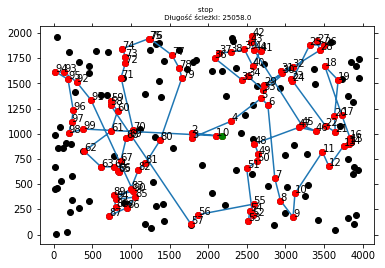

In [61]:
ix, ix_r = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()


def msls(ixxxx, ix_rest, distance_matrix):
    start = time()
    scores = []
    for i in range(100):
#         print(i)
        path = ixxxx.copy()
        rest = ix_rest.copy()
        start_path, stop_path, diff = cands_best(
        path, rest, distance_matrix, shuffle=True
        )
#         distance_matrix = calc_matrix(lat, lon)
        scores.append([calculate_path_length_numpy(stop_path, distance_matrix), stop_path])
    x = sorted(scores, key=operator.itemgetter(0))
    end = time()
    diff = end - start
    return [1], x[0][1], diff

_, stop_path, diff = msls(ix, ix_r, distance_matrix2)
print(diff)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 10.508975982666016
[105, 92, 191, 13, 56, 99, 73, 141, 68, 58, 40, 88, 163, 22, 149, 90, 94, 49, 138, 85, 195, 177, 151, 55, 70, 37, 129, 38, 147, 97, 113, 145, 142, 24, 16, 133, 21, 182, 154, 106, 108, 5, 156, 30, 46, 119, 111, 126, 185, 134, 41, 54, 63, 19, 159, 78, 176, 12, 14, 122, 197, 26, 190, 144, 84, 0, 52, 114, 116, 110, 173, 120, 171, 45, 109, 183, 36, 60, 135, 25, 8, 137, 123, 15, 178, 62, 50, 193, 115, 187, 43, 47, 165, 95, 164, 103, 118, 91, 98, 148]
[105, 92, 191, 13, 56, 99, 73, 141, 68, 58, 40, 88, 163, 22, 149, 90, 94, 49, 138, 85, 195, 177, 151, 55, 70, 37, 129, 38, 147, 97, 113, 145, 142, 24, 16, 133, 21, 182, 154, 106, 108, 5, 156, 30, 46, 119, 111, 126, 185, 134, 41, 54, 63, 19, 159, 78, 176, 12, 14, 122, 197, 26, 190, 144, 84, 0, 52, 114, 116, 110, 173, 120, 171, 45, 109, 183, 36, 60, 135, 25, 8, 137, 123, 15, 178, 62, 50, 193, 115, 187, 43, 47, 165, 95, 164, 103, 118, 91, 98, 148]


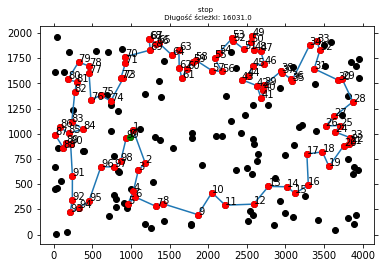

In [62]:
from datetime import datetime, timedelta


def perturbate1(path, rest, no = 4):
    for _ in range(int(no/2)):
        edges = get_edges_except(path)
        (edge1, edge2) = random.choice(edges)
        swap1_1 = edge1[1]
        swap2_0 = edge2[0]
        swap_items_in_path((swap1_1, swap2_0), path)
        reverse_part_of_list(swap1_1, swap2_0, path)
        
        swap1 = random.choice(path)
        swap2 = random.choice(rest)
        swap_item_value_in_list((swap1, swap2), path)
        swap_item_value_in_list((swap2, swap1), rest)

@timing
def ils1(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    ctr = 1
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate1(y, rr)
        
        _,y,_ = cands_best(y,rr,distance_matrix)
        ctr += 1
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return ctr, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils1(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

[1, 34, 184, 61, 82, 71, 129, 38, 27, 113, 97, 57, 140, 170, 87, 147, 37, 70, 55, 151, 177, 195, 4, 136, 42, 104, 85, 138, 49, 167, 172, 149, 94, 93, 90, 75, 69, 101, 143, 22, 163, 20, 153, 139, 168, 67, 29, 180, 124, 160, 76, 157, 79, 64, 150, 186, 5, 108, 156, 30, 66, 46, 119, 185, 54, 161, 176, 12, 197, 26, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 122, 14, 78, 159, 63, 19, 41, 134, 126, 111, 106, 74, 154, 182, 7, 21, 133, 53]
[1, 34, 184, 61, 82, 71, 129, 38, 27, 113, 97, 57, 140, 170, 87, 147, 37, 70, 55, 151, 177, 195, 4, 136, 42, 104, 85, 138, 49, 167, 172, 149, 94, 93, 90, 75, 69, 101, 143, 22, 163, 20, 153, 139, 168, 67, 29, 180, 124, 160, 76, 157, 79, 64, 150, 186, 5, 108, 156, 30, 66, 46, 119, 185, 54, 161, 176, 12, 197, 26, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 122, 14, 78, 159, 63, 19, 41, 134, 126, 111, 106, 74, 154, 182, 7, 21, 133, 53]


([2650,
  2636,
  3113,
  3174,
  3213,
  3394,
  3520,
  3635,
  3729,
  3683,
  3736,
  3853,
  3955,
  3911,
  3808,
  3874,
  3704,
  3646,
  3835,
  3854,
  3822,
  3756,
  3806,
  3875,
  3939,
  3888,
  3564,
  3479,
  3278,
  2991,
  2863,
  3022,
  3297,
  3249,
  3124,
  3099,
  2990,
  2848,
  2936,
  2781,
  2588,
  2576,
  2519,
  2542,
  2573,
  2499,
  2361,
  2599,
  2574,
  2421,
  2178,
  2097,
  2302,
  2232,
  2482,
  2586,
  2687,
  2716,
  2628,
  2433,
  2365,
  2513,
  2576,
  2597,
  2469,
  2290,
  2178,
  2048,
  1724,
  1660,
  1625,
  1393,
  1183,
  1362,
  1424,
  1327,
  1251,
  1234,
  1247,
  1357,
  1533,
  1621,
  1807,
  1838,
  2082,
  2139,
  2318,
  2312,
  2552,
  2573,
  2678,
  2728,
  2721,
  2933,
  2945,
  2961,
  3092,
  3078,
  3085,
  2773,
  2650],
 [802,
  727,
  885,
  1064,
  1085,
  1028,
  1079,
  1174,
  1188,
  1533,
  1542,
  1712,
  1743,
  1673,
  1375,
  1318,
  1082,
  1018,
  963,
  923,
  899,
  882,
  746,
  598,
  640,
 

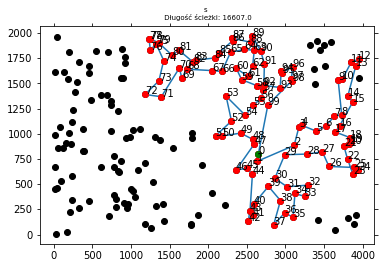

In [63]:
import random
import numpy as np

def find_closest_neigh_not_in_path(neigh, path, distance_matrix):
    for n in np.argsort(distance_matrix[:, neigh]):
        if n not in path:
            return n, distance_matrix[n, neigh]
#     return None

def find_smallest(path, distance_matrix):
    score = 99999999999999
    item_in_path = None
    item_not_in_path = None
    for item in path:
        new_item_not_in_path, new_score = find_closest_neigh_not_in_path(item, path, distance_matrix)
        if new_score < score:
            score = new_score
            item_in_path = item
            item_not_in_path = new_item_not_in_path
    return item_in_path, item_not_in_path

def insert_cost_lowest(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        new_length = edge_length_numpy(point, [x,y], distance_matrix)
        x_y_distance = edge_length_numpy(x,y,distance_matrix)
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points

def tsp_greedy_repair(tsp_outcome, distance_matrix):
    tsp_outcome.append(tsp_outcome[0])
    while len(tsp_outcome) < 101:
        _,ix_min = find_smallest(tsp_outcome, distance_matrix)
        x, y = insert_cost_lowest(ix_min, tsp_outcome, distance_matrix)
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
    return tsp_outcome[:-1]

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(distance_matrix)
# find_closest_neigh_not_in_path(1, [4,5,6], distance_matrix2)
# edge_length_numpy(1, [2], distance_matrix2)

# find_smallest([1,2,3], distance_matrix2)
t = tsp_greedy_repair([1,67,21], distance_matrix2)
distance_matrix = calc_matrix(lat, lon)
create_plot(t, lat, lon, "s", distance_matrix)

Elapsed time: 10.524025201797485
[54, 185, 119, 106, 108, 156, 46, 30, 66, 64, 79, 160, 150, 186, 5, 154, 182, 7, 145, 102, 113, 97, 87, 147, 27, 38, 129, 71, 82, 61, 184, 167, 172, 22, 149, 90, 143, 20, 139, 163, 168, 34, 1, 67, 40, 88, 2, 72, 58, 166, 59, 100, 3, 162, 92, 105, 148, 18, 98, 9, 174, 35, 56, 99, 155, 32, 44, 196, 65, 152, 43, 115, 187, 62, 15, 117, 123, 137, 135, 183, 28, 17, 189, 48, 45, 171, 120, 116, 114, 52, 0, 84, 144, 122, 190, 197, 78, 159, 19, 63]
[54, 185, 119, 106, 108, 156, 46, 30, 66, 64, 79, 160, 150, 186, 5, 154, 182, 7, 145, 102, 113, 97, 87, 147, 27, 38, 129, 71, 82, 61, 184, 167, 172, 22, 149, 90, 143, 20, 139, 163, 168, 34, 1, 67, 40, 88, 2, 72, 58, 166, 59, 100, 3, 162, 92, 105, 148, 18, 98, 9, 174, 35, 56, 99, 155, 32, 44, 196, 65, 152, 43, 115, 187, 62, 15, 117, 123, 137, 135, 183, 28, 17, 189, 48, 45, 171, 120, 116, 114, 52, 0, 84, 144, 122, 190, 197, 78, 159, 19, 63]


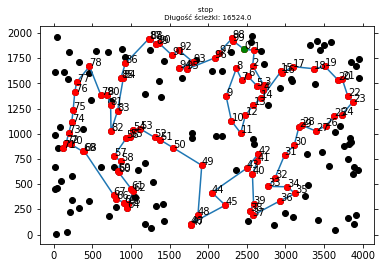

In [64]:
def perturbate2(path, distance_matrix, per = 20):
    random_choiced = random.choices(path, k = int((per/100) * len(path)))
    path = list(set(path) ^ set(random_choiced))
    path = tsp_greedy_repair(path, distance_matrix)
    
@timing
def ils2B(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    ctr = 1
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate2(y, distance_matrix)
        
        _,y,_ = cands_best(y,rr,distance_matrix)
        ctr += 1
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return ctr, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils2B(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 4.170175790786743
[161, 156, 182, 74, 111, 150, 186, 53, 124, 34, 1, 180, 168, 163, 88, 83, 51, 10, 95, 103, 164, 165, 188, 2, 72, 174, 98, 91, 18, 148, 191, 35, 9, 137, 198, 25, 31, 178, 187, 62, 193, 50, 117, 123, 36, 17, 171, 173, 45, 120, 192, 127, 76, 106, 64, 135, 60, 28, 189, 190, 197, 131, 116, 114, 84, 176, 66, 41, 134, 54, 185, 126, 154, 129, 138, 177, 195, 4, 151, 55, 94, 93, 27, 87, 113, 142, 24, 89, 16, 145, 102, 128, 133, 82, 184, 26, 122, 14, 78, 159]
[161, 156, 182, 74, 111, 150, 186, 53, 124, 34, 1, 180, 168, 163, 88, 83, 51, 10, 95, 103, 164, 165, 188, 2, 72, 174, 98, 91, 18, 148, 191, 35, 9, 137, 198, 25, 31, 178, 187, 62, 193, 50, 117, 123, 36, 17, 171, 173, 45, 120, 192, 127, 76, 106, 64, 135, 60, 28, 189, 190, 197, 131, 116, 114, 84, 176, 66, 41, 134, 54, 185, 126, 154, 129, 138, 177, 195, 4, 151, 55, 94, 93, 27, 87, 113, 142, 24, 89, 16, 145, 102, 128, 133, 82, 184, 26, 122, 14, 78, 159]


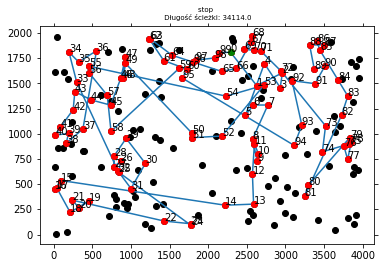

In [65]:
def perturbate2(path, distance_matrix, per = 20):
    random_choiced = random.choices(path, k = int((per/100) * len(path)))
    path = list(set(path) ^ set(random_choiced))
    path = tsp_greedy_repair(path, distance_matrix)
    
@timing
def ils2A(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate2(y, distance_matrix)
        
#         _,y,_ = cands_best(y,rr,distance_matrix)
        
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return start_path, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils2A(
path, rest, distance_matrix2,time=4
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [66]:
with open("paths.txt", "r") as file:
    data = file.readlines()


def aemmmmmmm4(title, program):
    final_scores = []
    for ix, items in enumerate(data[:10]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(200)]) - set(path))
        print(ix, path)
        print("p", len(path))
        print("r", len(rest))
        
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        
        start = time()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        end = time()
        diff = end - start
        
        distance_matrix = calc_matrix(lat, lon)
        path_len = calculate_path_length_numpy(stop_path, distance_matrix2)
        scores = [diff, path_len, stop_path, start_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath","Num"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    df["Num"] = df["Num"].astype("float")
    
    display(df)
    display(df.describe())
    df.to_csv(title)
    
# aemmmmmmm4("ilsssssss2BBB1krob", ils2B)

In [67]:
def create_plot_numpy(tsp_outcome, lat, lon, title, distance_matrix, ndm):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length_numpy(tsp_outcome, ndm)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}", fontsize=7)
    plt.savefig(f"{title}.png", format="png", dpi=1200)

    return x, y

c = pd.read_csv("msls")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
ndm = distance_matrix.to_numpy()
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot_numpy(
    p,
    lat,
    lon,
    "Algorytm MSLS - krob200",
    distance_matrix,
    ndm
)

11.899007320404053
[21, 16, 142, 145, 102, 113, 97, 87, 27, 37, 129, 71, 82, 5, 108, 53, 156, 119, 185, 41, 126, 182, 154, 74, 106, 186, 76, 192, 127, 157, 180, 124, 149, 90, 93, 94, 138, 49, 167, 172, 163, 20, 139, 166, 59, 100, 146, 26, 190, 144, 84, 52, 0, 110, 45, 173, 120, 105, 148, 98, 47, 121, 193, 115, 165, 103, 118, 65, 178, 171, 162, 191, 107, 73, 196, 155, 32, 152, 43, 187, 62, 9, 174, 18, 189, 36, 137, 8, 77, 81, 6, 198, 25, 135, 183, 48, 197, 78, 176, 30]
[21, 16, 142, 145, 102, 113, 97, 87, 27, 37, 129, 71, 82, 5, 108, 53, 156, 119, 185, 41, 126, 182, 154, 74, 106, 186, 76, 192, 127, 157, 180, 124, 149, 90, 93, 94, 138, 49, 167, 172, 163, 20, 139, 166, 59, 100, 146, 26, 190, 144, 84, 52, 0, 110, 45, 173, 120, 105, 148, 98, 47, 121, 193, 115, 165, 103, 118, 65, 178, 171, 162, 191, 107, 73, 196, 155, 32, 152, 43, 187, 62, 9, 174, 18, 189, 36, 137, 8, 77, 81, 6, 198, 25, 135, 183, 48, 197, 78, 176, 30]


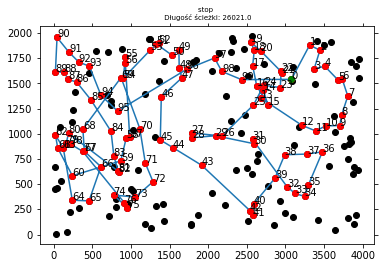

In [69]:
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()


def newmsls(distance_matrix):
    start = time()
    scores = []
    for i in range(100):
#         print(i)
        path, rest = create_random_vertexes2(100)
        start_path, stop_path, diff = cands_best(
        path, rest, distance_matrix)
#         distance_matrix = calc_matrix(lat, lon)
        scores.append([calculate_path_length_numpy(stop_path, distance_matrix), stop_path])
    x = sorted(scores, key=operator.itemgetter(0))
    end = time()
    diff = end - start
    return [1], x[0][1], diff

_, stop_path, diff = newmsls(distance_matrix2)
print(diff)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 0.03561830520629883
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.01562190055847168
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0
edges 10
pre [2, 72, 188, 141, 130, 40, 58, 68, 67, 29, 168, 88]
pre [2, 72, 188, 141, 179, 130, 40, 58, 68, 107, 73, 155, 99, 32, 80, 96, 44, 196, 118, 91, 18, 148, 92, 162, 105, 98, 9, 174, 56, 35, 13, 191, 67, 29, 157, 76, 79, 186, 30, 66, 46, 119, 185, 54, 161, 176, 12, 197, 26, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 122, 14, 78, 159, 63, 19, 41, 134, 126, 111, 154, 182, 7, 21, 133, 74, 156, 106, 108, 5, 53, 150, 160, 124, 180, 1, 34, 168, 172, 149, 94, 93, 90, 75, 69, 101, 143, 22, 88, 2]
19274.0
edges 74
pre [47, 169, 141, 130, 5, 53, 1, 34, 188, 68, 31, 23, 164, 165, 77, 81, 179,

pre [47, 169, 178, 100, 59, 141, 130, 1, 34, 188, 68, 164, 165, 179, 103, 162, 3, 51, 10, 127, 192, 168, 2, 72, 173, 158, 120, 45, 171, 35, 56, 99, 32, 96, 28, 109, 17, 48, 189, 148, 131, 84, 144, 190, 14, 122, 197, 26, 79, 186, 46, 156, 106, 108, 5, 53, 150, 160, 124, 180, 67, 40, 58, 44, 196, 80, 95, 125, 83, 121, 115, 187, 43, 62, 193, 50, 15, 117, 36, 123, 137, 8, 77, 81, 198, 25, 31, 23, 135, 60, 183, 88, 155, 29, 73, 86, 105, 92, 65, 152, 47]
41922.0
edges 74
pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 31, 23, 164, 165, 77, 81, 179, 105, 92, 103, 121, 115, 162, 3, 51, 10, 192, 157, 127, 25, 135, 60, 187, 168, 2, 72, 117, 123, 45, 171, 99, 32, 96, 28, 109, 158, 173, 17, 48, 189, 148, 79, 160, 124, 180, 67, 76, 44, 196, 15, 120, 80, 40, 58, 95, 125, 198, 83, 62, 155, 43, 88, 29, 86, 8, 137]
pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 31, 23, 183, 164, 165, 77, 81, 178, 35, 179, 105, 92, 103, 121, 115, 162, 3, 51, 10, 192, 157, 127, 25, 135, 60, 187, 168, 2, 72, 117, 123, 

pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 31, 23, 183, 164, 165, 77, 81, 179, 103, 162, 3, 121, 115, 51, 10, 127, 192, 25, 135, 168, 2, 72, 56, 35, 152, 187, 178, 45, 171, 117, 123, 99, 32, 60, 28, 109, 17, 48, 158, 173, 189, 148, 96, 73, 79, 186, 30, 66, 46, 119, 185, 41, 134, 126, 111, 156, 106, 108, 5, 53, 150, 160, 124, 180, 67, 40, 58, 120, 44, 196, 80, 65, 15, 95, 125, 198, 50, 83, 62, 88, 155, 29, 43, 86, 193, 8, 36, 105, 92, 137, 47]
60079.0
edges 67
pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 31, 23, 164, 165, 77, 81, 179, 105, 92, 103, 162, 3, 51, 10, 127, 192, 25, 135, 168, 2, 72, 60, 117, 123, 45, 171, 99, 32, 96, 28, 109, 158, 173, 17, 48, 189, 148, 79, 160, 124, 180, 67, 40, 58, 44, 196, 15, 80, 120, 95, 125, 198, 83, 88, 155, 29, 86, 8, 137]
pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 31, 23, 183, 65, 164, 165, 43, 62, 77, 81, 36, 35, 56, 179, 105, 92, 103, 162, 3, 51, 10, 127, 192, 25, 135, 168, 2, 72, 60, 117, 123, 45, 171, 99, 32, 96, 28, 109, 158, 17

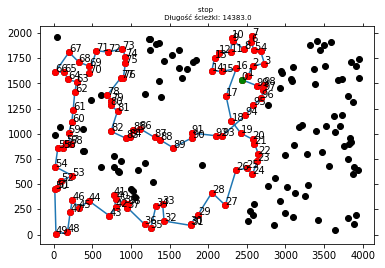

In [70]:
def new_get_combs(current_tsp):
    return [
        (current_tsp[i], current_tsp[i + 1]) for i, d in enumerate(current_tsp[:-1])
    ]

def greedy_recombine(tsp_outcome, distance_matrix, size=100):
    tsp_outcome.append(tsp_outcome[0])
    while len(tsp_outcome) < size + 1:
        _,ix_min = find_smallest(tsp_outcome, distance_matrix)
        x, y = insert_cost_lowest(ix_min, tsp_outcome, distance_matrix)
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
    return tsp_outcome[:-1]


def flatten_edges(edges):
    print("edges", len(edges))
    if len(edges) == 0:
        return []
    path = list(sum(edges, ()))
    indexes = np.unique(path, return_index=True)[1]
    path = [path[index] for index in sorted(indexes)]
#     if path[-1] != path[0]:
#         path.append(path[0])
    return path
    
def recombine(parent1, parent2, distance_matrix):
    parent1.append(parent1[0])
    parent2.append(parent2[0])
    
    pl1 = calculate_path_length_numpy(parent1, distance_matrix)
    pl2 = calculate_path_length_numpy(parent2, distance_matrix)
    
    parent1_edges = new_get_combs(parent1)
    parent2_edges = new_get_combs(parent2)
    
    child = list(set(parent1_edges).intersection(parent2_edges))
#     child = [edges for edges in parent1_edges if edges not in parent2_edges]
    
#     child =  np.setdiff1d(parent1_edges,parent2_edges)
    child = flatten_edges(child)
    if len(child) == 0:
        x = random.choice(range(len(distance_matrix)))
        child = [x]
    
    print("pre", child)
    final =  greedy_recombine(child, distance_matrix)
    print("pre", child)
    
    return final
    
@timing
def steadystate(distance_matrix, population_size=20, time=10):
    population  = []
    v = random.choices(range(200), k=population_size)
    for vertex in v:
#         v = [vertex]
        dmmm = np.copy(distance_matrix)
        stop_path,_, _ = new_tsp_nn( 
        dmmm, selected_vertex=vertex
        )
#         stop_path = greedy_recombine(v, distance_matrix)
        population.append(stop_path[:-1])
    path_lengths = [calculate_path_length_numpy(p,distance_matrix) for p in population]
    
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        parent1, parent2 = random.sample(population, 2)
        p1 = parent1.copy()
        p2 = parent2.copy()
        
        child = recombine(p1, p2, distance_matrix)
        child_length = calculate_path_length_numpy(child, distance_matrix)
        max_path_length = max(path_lengths)
        print(child_length)
        if child_length < max_path_length:
            max_index = path_lengths.index(max_path_length)
            population[max_index] = child
            path_lengths[max_index] = child_length
        
    return [], population[path_lengths.index(min(path_lengths))]

lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
_, stop_path, diff = steadystate(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot_numpy(stop_path, lat, lon, "stop", distance_matrix, distance_matrix2)

def recombine2(parent1, parent2, distance_matrix):
    parent1.append(parent1[0])
    parent2.append(parent2[0])
    
    pl1 = calculate_path_length_numpy(parent1, distance_matrix)
    pl2 = calculate_path_length_numpy(parent2, distance_matrix)
    
    parent1_edges = new_get_combs(parent1)
    parent2_edges = new_get_combs(parent2)
    
    child = list(set(parent1_edges).intersection(parent2_edges))
#     child =  np.setdiff1d(parent1_edges,parent2_edges) if pl1 > pl2 else  np.setdiff1d(parent2_edges,parent1_edges)
    child = flatten_edges(child)
    if len(child) == 0:
        x = random.choice(range(len(distance_matrix)))
        child = [x]
    
    child_edges = new_get_combs(child)
    p1_rest = list(set(parent1_edges) - set(child_edges))
    p2_rest = list(set(parent2_edges) - set(child_edges))
    p_rest = p1_rest + p2_rest
    
    
    while len(child) < len(distance_matrix) / 2:
        for item in p_rest:
            if item not in child:
                insert_after_element(child, random.choice(child), item)
                break
        random.shuffle(p_rest)
    print("c", len(child))
    return child
    
@timing
def steadystate2(distance_matrix, population_size=20, time=10):
    population  = []
    v = random.choices(range(200), k=population_size)
    for vertex in v:
#         v = [vertex]
        dmmm = np.copy(distance_matrix)
        stop_path,_, _ = new_tsp_nn( 
        dmmm, selected_vertex=vertex
        )
#         stop_path = greedy_recombine(v, distance_matrix)
        print(stop_path)
        population.append(stop_path[:-1])
    path_lengths = [calculate_path_length_numpy(p,distance_matrix) for p in population]
    print(path_lengths)
    
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        parent1, parent2 = random.sample(population, 2)
        p1 = parent1.copy()
        p2 = parent2.copy()
        
        child = recombine2(p1, p2, distance_matrix)
        child_length = calculate_path_length_numpy(child, distance_matrix)
        max_path_length = max(path_lengths)
        print(child_length)
        if child_length < max_path_length:
            max_index = path_lengths.index(max_path_length)
            population[max_index] = child
            path_lengths[max_index] = child_length
        
    return [], population[path_lengths.index(min(path_lengths))]

lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
_, stop_path, diff = steadystate2(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot_numpy(stop_path, lat, lon, "stop", distance_matrix, distance_matrix2)

def recombine3(parent1, parent2, distance_matrix):
    parent1.append(parent1[0])
    parent2.append(parent2[0])
    
    pl1 = calculate_path_length_numpy(parent1, distance_matrix)
    pl2 = calculate_path_length_numpy(parent2, distance_matrix)
    
    parent1_edges = new_get_combs(parent1)
    parent2_edges = new_get_combs(parent2)
    
    if pl1 < pl2:
        primary_parent = parent1
        secondary_parent = parent2
    else:
        primary_parent = parent2
        secondary_parent = parent1
        
    primary_edges = new_get_combs(primary_parent)
    secondary_edges = new_get_combs(secondary_parent)
    
    child = [pe for pe in primary_edges if pe in secondary_edges]
    child = flatten_edges(child)
    
    if len(child) == 0:
        x = random.choice(range(len(distance_matrix)))
        child = [x]
    return final
    
@timing
def steadystate3(distance_matrix, population_size=20, time=100):
    population  = []
    v = random.choices(range(200), k=population_size)
    for vertex in v:
        path, rest = create_random_vertexes2(100)
        start_path, stop_path, diff = cands_best(
        path, rest, distance_matrix
        )
        population.append(stop_path)
    
    path_lengths = [calculate_path_length_numpy(p,distance_matrix) for p in population]
    print(path_lengths)
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        parent1, parent2 = random.sample(population, 2)
        p1 = parent1.copy()
        p2 = parent2.copy()
        
        child = recombine(p1, p2, distance_matrix)
        _, child,_ = outer_vertex_inner_edge_steepest(child, list(set([i for i in range(200)]) - set(child)), distance_matrix)
        child_length = calculate_path_length_numpy(child, distance_matrix)
        max_path_length = max(path_lengths)
        print(child_length)
        if child_length < max_path_length:
            max_index = path_lengths.index(max_path_length)
            population[max_index] = child
            path_lengths[max_index] = child_length
        
    return [], population[path_lengths.index(min(path_lengths))]

lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
_, stop_path, diff = steadystate3(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot_numpy(stop_path, lat, lon, "stop", distance_matrix, distance_matrix2)

In [ ]:
def piupiu(title):
    final_scores = []
    for _ in range(10):
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()

        
        start = time()
        _, stop_path, diff = steadystate3(distance_matrix2, time=100)
        end = time()
        diff = end - start
        
        distance_matrix = calc_matrix(lat, lon)
        path_len = calculate_path_length_numpy(stop_path, distance_matrix2)
        scores = [diff, path_len, stop_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    
    display(df)
    display(df.describe())
    df.to_csv(title)
    
piupiu("lab5krob")

c = pd.read_csv("lab5krobb")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
ndm = distance_matrix.to_numpy()
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot_numpy(
    p,
    lat,
    lon,
    "Algorytm Ewolucyjny - kroB200",
    distance_matrix,
    ndm
)

#final test
def create_random_vertexes3(number_of_samples, r):
    l = [int(i) for i in range(0, r)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest
    
paths = []
for _ in range(1000):
    path, _ = create_random_vertexes3(50, 100)
    if path not in paths:
        paths.append(path)

with open("pathsKRO100.txt", "w") as file:
    for line in paths:
        file.write(" ".join([str(i) for i in line]))
        file.write("\n")


In [ ]:
with open("pathsKRO200.txt", "r") as file:
    data = file.readlines()


def krzysiu_test(title, instance, num):
    final_scores = []
    for ix, items in enumerate(data[:2]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(num)]) - set(path))
        print(title, "iter: ", ix)
        lat, lon = get_lat_lon_from_url(target_url=instance)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
            path, rest, distance_matrix2
        )
        path_len = calculate_path_length_numpy(stop_path, distance_matrix2)
        scores = [diff, path_len, stop_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    
    display(df)
    display(df.describe())
    df.to_csv(title)
    
krzysiu_test("kroa200RUNLAST", instance=target_url_kroa200,num=200)
krzysiu_test("krob200RUNLAST", instance=target_url_krob200,num=200)

kroa200RUNLAST iter:  0
Elapsed time: 33.65781044960022
kroa200RUNLAST iter:  1
Elapsed time: 59.975175619125366


<ipython-input-98-36be38733ed7>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])


,Time,PathLen,FinalPath
0,33.657810,17522.0,"[71, 49, 94, 93, 90, 149, 172, 143, 69, 101, 1..."
1,59.975176,18510.0,"[19, 63, 161, 66, 30, 176, 12, 197, 26, 190, 1..."


,Time,PathLen
count,2.000000,2.0000
mean,46.816493,18016.0000
std,18.609187,698.6215
min,33.657810,17522.0000
25%,40.237152,17769.0000
50%,46.816493,18016.0000
75%,53.395834,18263.0000
max,59.975176,18510.0000


krob200RUNLAST iter:  0
Elapsed time: 73.32959461212158
krob200RUNLAST iter:  1
